In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from numpy import array

2022-09-20 00:20:09.548195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-20 00:20:09.548228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Replace missing values with Zero and Group by month

<AxesSubplot:xlabel='date'>

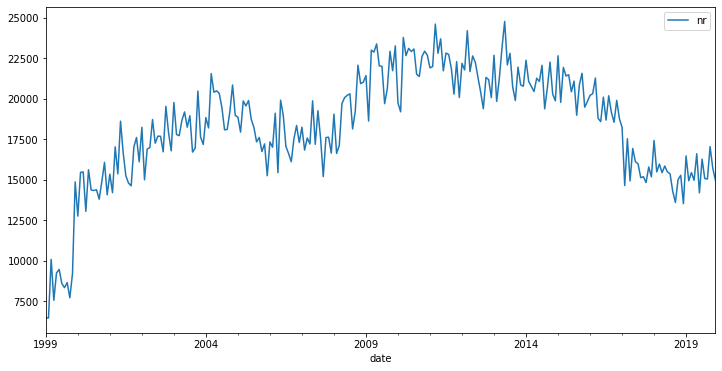

In [2]:
df= pd.read_csv('consumos.csv', parse_dates=['date'])
df['nr'].fillna(value=0, inplace=True)
df=df.groupby('date').sum()
df=df.resample(rule='MS').sum()
dataset = df.values
dataset = df.astype('float32')
df.plot(figsize=(12,6))

### Transform features by scaling each feature to a given range

### Normalize Data Set and Split Train and Test

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
train=dataset[:240]
test=dataset[240:] 
actual=df[240:] 

### Create batches of training data (12 months)

In [5]:
def split_sequence(sequence, n_steps_in, n_steps_out, slide):
    X, y = list(), list()
    for i in range(0, len(sequence), slide):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [6]:
raw_seq = train
n_steps_in, n_steps_out, slide = 6,6,2
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out, slide)

### Define and fit LSTM model 

In [7]:
callback = EarlyStopping(monitor='loss', patience=50)
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps_in, 1)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=1000, callbacks=[callback])

2022-09-20 00:20:11.466382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 00:20:11.466418: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 00:20:11.466442: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-09-20 00:20:11.466726: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 0.4777
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.4413
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.4041
Epoch 4/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3672
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.3282
Epoch 6/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2867
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2396
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1844
Epoch 9/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0588
Epoch 11/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 12/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 104/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 105/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 106/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 107/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 108/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 109/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 110/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 111/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 112/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 113/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 114/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 205/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 206/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 207/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 208/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 209/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 210/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 211/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 212/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 213/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 214/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 215/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 306/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 307/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 308/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 309/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 310/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 311/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 312/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 313/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 314/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 315/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 316/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 407/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 408/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 409/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 410/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 411/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 412/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 413/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 414/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 415/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 416/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 417/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 418/1000
4/4 [=======================

4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 508/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 509/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 510/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 511/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 512/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 513/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 514/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 515/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 516/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 517/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 518/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 609/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 610/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 611/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 612/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 613/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 614/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 615/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 616/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 617/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 618/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 619/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 710/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 711/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 712/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 713/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 714/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 715/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 716/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 717/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 718/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 719/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 720/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 811/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 812/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 813/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 814/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 815/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 816/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 817/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 818/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 819/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 820/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 821/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 912/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 913/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 914/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 915/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 916/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 917/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 918/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 919/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 920/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 921/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 922/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0059
Epoch 923/1000
4/4 [===================

### Plot losses per epoch

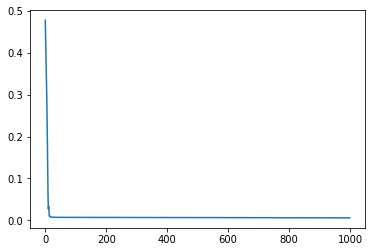

In [8]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Test Predicitions

In [9]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [10]:
x_input = train[-n_steps_in:]
x_input = x_input.reshape((1, n_steps_in, 1))
pred = model.predict(x_input).reshape(-1, 1)

In [11]:
x_input = pred
x_input = x_input.reshape((1, n_steps_in, 1))
pred1 = model.predict(x_input).reshape(-1, 1)
pred1 = scaler.inverse_transform(pred1)

In [12]:
pred = scaler.inverse_transform(pred)
pred = pred.tolist()
for i in range(0, len(pred)): pred[i] = pred[i][0]
pred1 = pred1.tolist()
for i in range(0, len(pred1)): pred1[i] = pred1[i][0]
pred.extend(pred1)

In [13]:
pred

[15183.375,
 14506.111328125,
 15304.5693359375,
 15002.4599609375,
 15676.595703125,
 15041.6865234375,
 16006.287109375,
 15105.44140625,
 15989.4755859375,
 15390.6591796875,
 16176.55859375,
 15514.1787109375]

### Calculate Error

In [14]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [15]:
np.sqrt(mean_squared_error(df[240:]['nr'], pred)), mean_absolute_error(df[240:]['nr'], pred), MAPE(df[240:]['nr'], pred)

(798.8308100486095, 630.8502604166666, 3.982916774883903)

### Plot

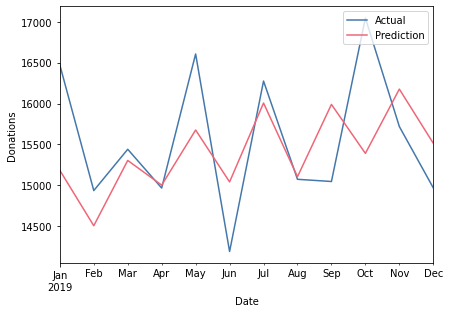

In [16]:
cm = 1/2.54 
df[240:]['nr'].plot(legend=True, color=['#4477AA'])
pd.DataFrame(pred, index=df[240:]['nr'].index.values, columns=['nr'])['nr'].plot(figsize=(17*cm,12*cm), color=['#EE6677'])
plt.legend(['Actual', 'Prediction'],loc='upper right')
plt.ylabel('Donations')
plt.xlabel('Date')
plt.savefig('LSTM.pdf')

In [17]:
index_of_fc = pd.date_range(df[240:].index[0], periods = 12, freq='MS')
demand_prediction_lstm = pd.Series(pred, index=index_of_fc)
%store demand_prediction_lstm

Stored 'demand_prediction_lstm' (Series)
